In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [20]:
p = Path("./Dataset/")

dirs = p.glob("*")


image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

Dataset\Bulbasaur
173
Dataset\Meowth
70
Dataset\Pikachu
199


## Visualisation

In [21]:
import numpy as np

In [22]:
print(len(image_data))
print(len(labels))

442
442


In [23]:
import random
random.seed(10)

In [24]:
X = np.array(image_data)
Y = np.array(labels)

# shuffle
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalisation
X = X/255.0

In [25]:
print(Y)

[2 0 1 1 0 1 0 1 2 1 0 2 0 0 1 0 0 2 0 0 0 2 0 1 0 1 1 0 1 1 0 2 1 0 0 0 2
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 2 1 0 0 0 0 1 1 1 0 1 2 1 1 1 2 0 1 1 0 0 1 2
 1 2 1 0 0 2 0 0 0 0 1 0 0 1 2 1 1 1 0 0 1 0 1 2 1 2 1 2 1 0 1 1 0 0 2 0 0
 0 0 1 0 0 1 2 1 1 0 0 2 1 0 0 0 0 0 0 0 2 1 2 0 0 1 1 0 2 0 0 0 0 2 0 2 1
 1 0 2 0 0 1 2 1 0 0 1 0 1 2 0 1 0 1 2 0 0 1 0 2 1 1 0 0 0 1 1 0 0 1 1 1 0
 2 2 2 0 1 1 2 1 0 1 0 0 0 1 2 1 1 0 0 2 1 2 0 2 1 2 2 1 1 0 2 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1 0 0
 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 2
 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0 0 2
 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 1 0 0 1 0 1 1 1 1]


In [17]:
# Draw some pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

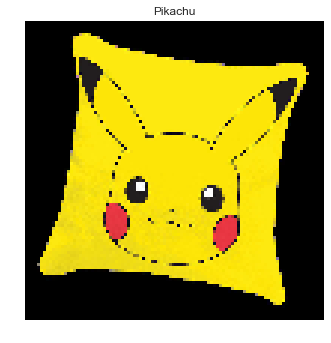

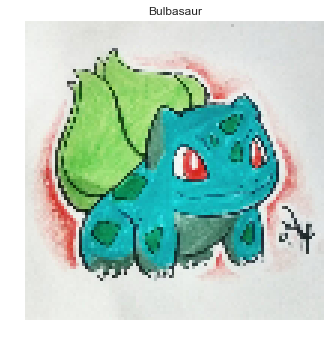

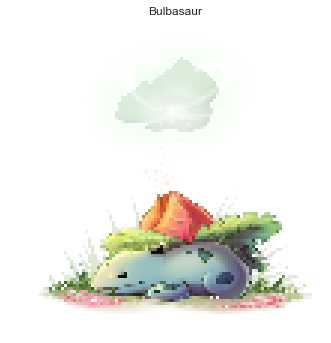

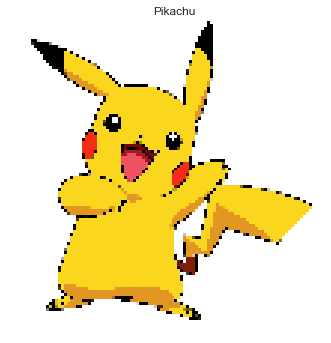

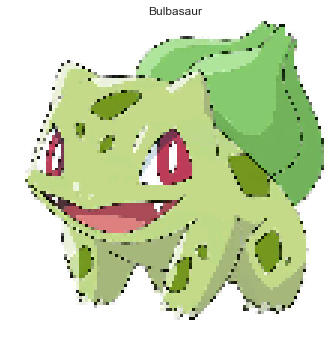

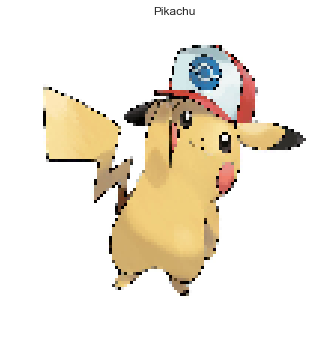

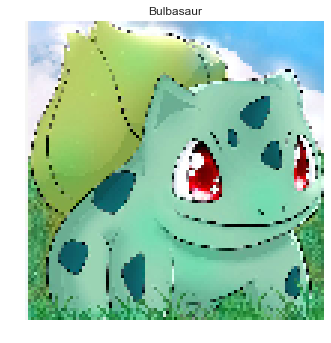

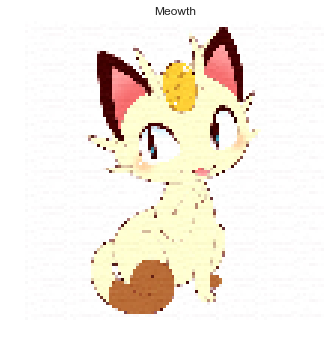

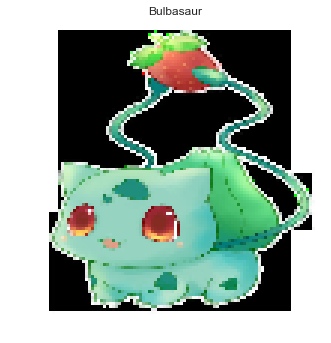

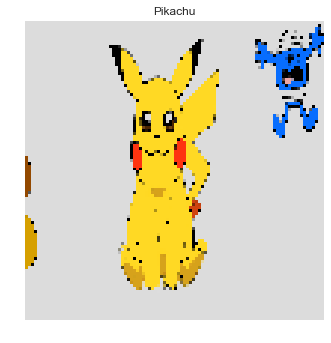

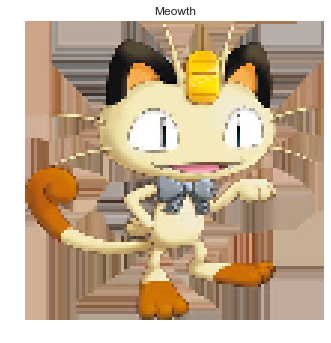

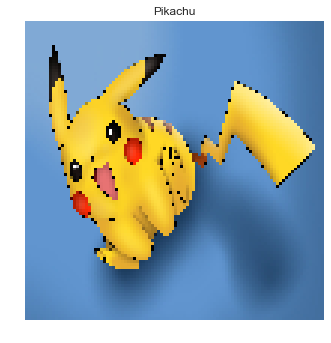

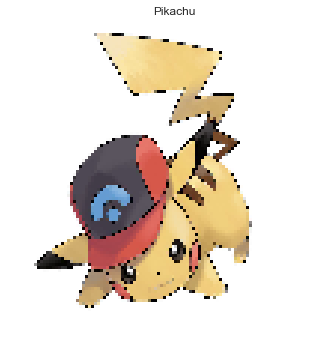

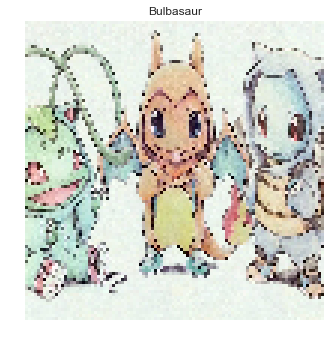

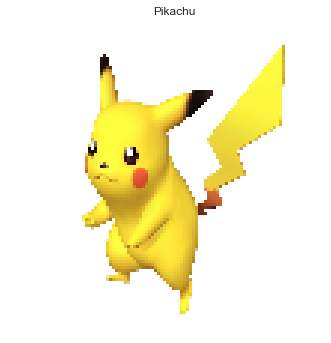

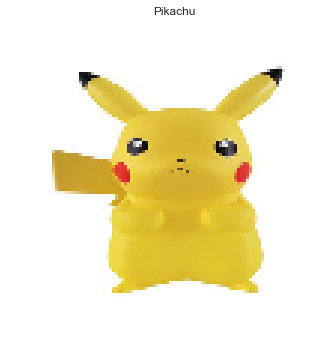

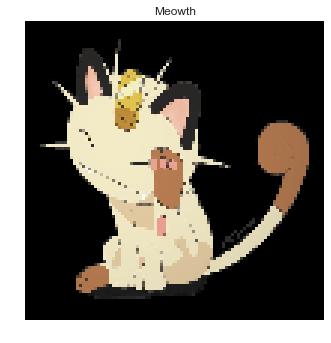

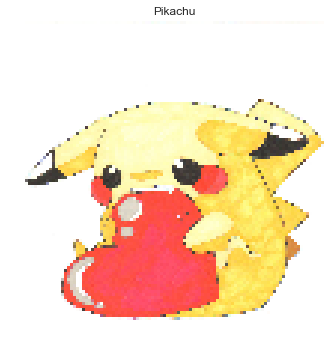

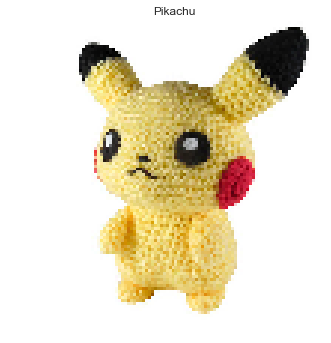

In [19]:
for i in range(1,20):
    drawImg(X[i],Y[i])  

In [26]:
### Create Training and Testing Set

split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(353, 40, 40, 3) (353,)
(89, 40, 40, 3) (89,)


In [27]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans        

In [28]:

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [29]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [30]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)

In [31]:
print(X.shape)

(353, 40, 40, 3)


In [32]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(353, 4800)
(89, 4800)


In [33]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2394
Epoch 50 Loss 0.2418
Epoch 100 Loss 0.1105
Epoch 150 Loss 0.0770
Epoch 200 Loss 0.0617
Epoch 250 Loss 0.0507
Epoch 300 Loss 0.0394
Epoch 350 Loss 0.0326
Epoch 400 Loss 0.0280
Epoch 450 Loss 0.0244


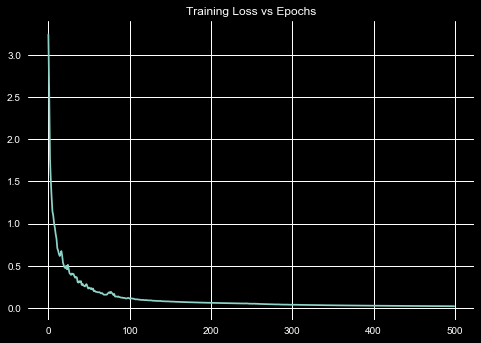

In [34]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [35]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9887
Test Acc 0.5169


In [36]:
from sklearn.metrics import confusion_matrix

In [38]:
from visualize import plot_confusion_matrix

In [39]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[160   2   1]
 [  1 130   0]
 [  0   0  59]]


Confusion matrix, without normalization
[[160   2   1]
 [  1 130   0]
 [  0   0  59]]


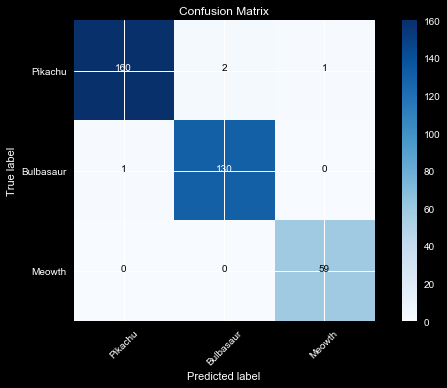

In [40]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       163
           1       0.98      0.99      0.99       131
           2       0.98      1.00      0.99        59

   micro avg       0.99      0.99      0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



              precision    recall  f1-score   support

           0       0.58      0.63      0.60        35
           1       0.49      0.59      0.53        34
           2       0.40      0.20      0.27        20

   micro avg       0.52      0.52      0.52        89
   macro avg       0.49      0.47      0.47        89
weighted avg       0.50      0.52      0.50        89

Confusion matrix, without normalization
[[22 10  3]
 [11 20  3]
 [ 5 11  4]]


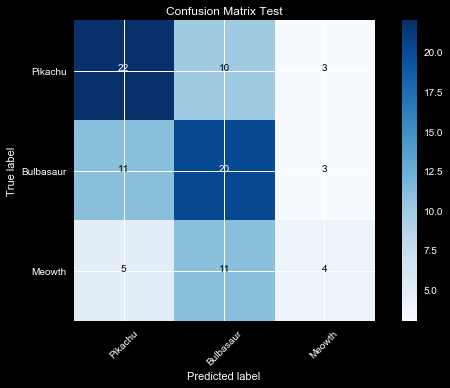

In [43]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")


### Visualise Misclassifications


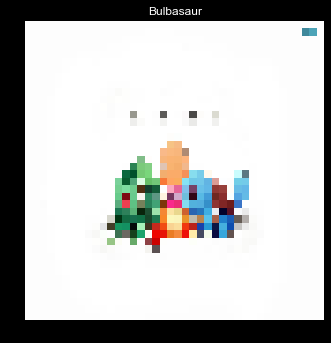

Prediction 113 Pikachu


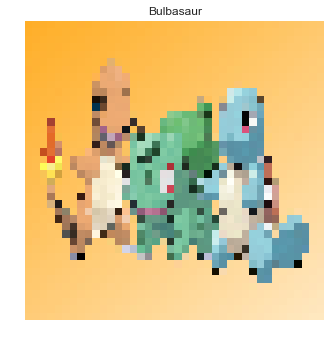

Prediction 178 Pikachu


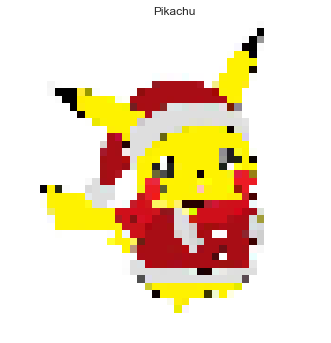

Prediction 226 Bulbasaur


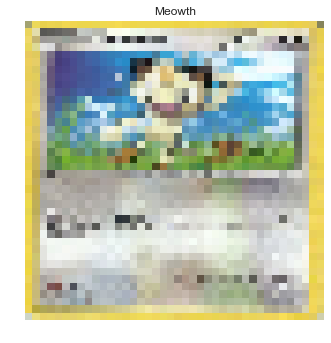

Prediction 237 Pikachu


In [44]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))